In [1]:
!nvidia-smi

Wed Aug 28 15:52:05 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P8              6W /   75W |     548MiB /   4096MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
print("Hello World")

Hello World


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#persamaan tridiagonal

def tridag(a, b, c, u, n, ng):
  temp = b[0]                     # pers. (4.1)
  u[0] = u[0]/temp                # pers. (4.2)
  for j in range(1, n):
    temp1 = b[j]
    b[j] = c/temp
    temp = temp1-a*b[j]           # pers. (4.5)
    u[j] = (u[j]-a*u[j-1])/temp   # pers. (4.6) untuk mendapatkan nilai baru
  for j in range(n-2, -1, -1):
    u[j] = u[j]-b[j+1]*u[j+1]     # pers. (4.7)
  return u

In [3]:
#persamaan metode filter

def filter1D(dx, vpot, psi, energy, n, k):
  dx2 = dx*dx
  a = -0.5/dx2                          # pers. (4.8)
  c = a
  odx2 = 1/dx2
  b = np.zeros(n)
  for k in range(0, 5):
    for i in range(0, n):
      b[i] = (odx2+vpot[i]-energy)      # pers. (4.9)
    global tridag
    psi = tridag(a, b, c, psi, n, n)
  fnorm = sum(psi*psi)*dx               # pers. (4.10)
  psi = psi/(fnorm**0.5)                # pers. (4.11)
  return psi

In [4]:
#persamaan hamiltonian

def hamiltonian(dx, vpot, psi, ng):
  dx2 = dx*dx
  a = -0.5/dx2
  c = a
  odx = 1/dx2
  u = np.zeros(ng)
  u[0] = ((odx+vpot[0])*psi[0]+c*psi[1])                # pers. (4.12)
  for i in range(1, ng-1):
    u[i] = (a*psi[i-1]+(odx+vpot[i])*psi[i]+c*psi[i+1]) # pers. (4.13)
  u[-1] = ((a*psi[-2])+(odx+vpot[-1])*psi[-1])          # pers. (4.14)
  psiu = psi*u
  energy_new = sum(psiu)*dx
  return energy_new

In [5]:
#persamaan eigenState

def eigenState(x, ngrid, vpot, initE, dx):
    if initE <=0:
        initE = initE + 1e-12

    x_tart = x[0]
    x_end = x[ngrid - 1]
    psi = np.zeros(ngrid)
    energy = initE  # Inisialisasi energy di sini
    if x_tart < 0:
        for i in range(0, ngrid):
            psi[i] = (np.sin(x[i]) + np.cos(x[i]))
    else:
        for i in range(0, ngrid):
            psi[i] = 1 + x[i] / x_end
    #psi=np.linspace(1,1,ngrid) + x/x[-1]
    error = 1e3
    loop = 1
    while error > 1e-12:
        nloop = 10
        if loop == 1:
            nloop = 10  # nloop
        global filter1D
        global hamiltonian
        psi = filter1D(dx, vpot, psi, energy, ngrid, nloop)
        energy_new = hamiltonian(dx, vpot, psi, ngrid)
        error = abs(energy_new - energy) / energy
        energy = energy_new
        loop = loop + 1

    output = [energy_new, psi]
    return output

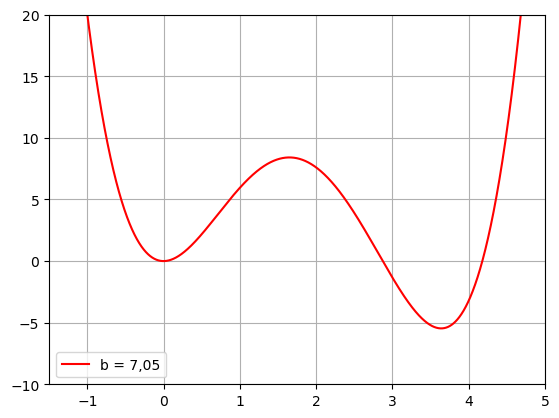

In [6]:
# inputan parameter potensial (cell yang diubah-ubah)
xmin = -10
xmax = 10
dx = 1e-3
leb = xmax-xmin
ngrid = int(leb/dx)

# parameter tetap
a = 12
c = 1

# parameter berubah
b = [7.05, 23, 24, 25, 26, 27]

x = np.zeros(ngrid)
vpot0 = np.zeros(ngrid)
vpot1 = np.zeros(ngrid)
vpot2 = np.zeros(ngrid)
vpot3 = np.zeros(ngrid)
vpot4 = np.zeros(ngrid)
vpot5 = np.zeros(ngrid)

# Rumusan potensial
for i in range(0,ngrid):
  x[i] = xmin + ((i-1)*dx)
  vpot0[i] = a*x[i]**2 - b[0]*x[i]**3 + c*x[i]**4
  #vpot1[i] = a*x[i]**2 - b[1]*x[i]**3 + c*x[i]**4
  #vpot2[i] = a*x[i]**2 - b[2]*x[i]**3 + c*x[i]**4
  #vpot3[i] = a*x[i]**2 - b[3]*x[i]**3 + c*x[i]**4
  #vpot4[i] = a*x[i]**2 - b[4]*x[i]**3 + c*x[i]**4
  #vpot5[i] = a*x[i]**2 - b[5]*x[i]**3 + c*x[i]**4

plt.plot(x,vpot0,color='red',label='b = 7,05')
#plt.plot(x,vpot1,color='green',label='b = 23')
#plt.plot(x,vpot2,color='blue',label='b = 24')
#plt.plot(x,vpot3,color='orange',label='b = 25')
#plt.plot(x,vpot4,color='brown',label='b = 26')
#plt.plot(x,vpot5,color='cyan',label='b = 27')
plt.legend()
plt.ylim(-10,20)
plt.xlim(-1.5,5)
plt.grid()
plt.show()

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 22
initE = 1
initE2= 5
initE3= 8

output = eigenState(x, ngrid, vpot0, initE, dx)
output2 = eigenState(x, ngrid, vpot0, initE2, dx)
output3 = eigenState(x, ngrid, vpot0, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-1.5, 5)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 22")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

In [25]:
energy_new

1.4896915797564114

In [26]:
energy_new2

2.357357193916823

In [27]:
energy_new3

5.878419706269748

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 23
initE = 2
initE2= 4
initE3= 8

output = eigenState(x, ngrid, vpot1, initE, dx)
output2 = eigenState(x, ngrid, vpot1, initE2, dx)
output3 = eigenState(x, ngrid, vpot1, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-2, 3)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 23")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 24
initE = 1
initE2= 3
initE3= 7

output = eigenState(x, ngrid, vpot2, initE, dx)
output2 = eigenState(x, ngrid, vpot2, initE2, dx)
output3 = eigenState(x, ngrid, vpot2, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-2, 3)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 24")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 25
initE = -8
initE2= -2
initE3= 2

output = eigenState(x, ngrid, vpot3, initE, dx)
output2 = eigenState(x, ngrid, vpot3, initE2, dx)
output3 = eigenState(x, ngrid, vpot3, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 25")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 26
initE = -8
initE2= -2
initE3= 2

output = eigenState(x, ngrid, vpot4, initE, dx)
output2 = eigenState(x, ngrid, vpot4, initE2, dx)
output3 = eigenState(x, ngrid, vpot4, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 26")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 27
initE = -8
initE2= -2
initE3= 2

output = eigenState(x, ngrid, vpot5, initE, dx)
output2 = eigenState(x, ngrid, vpot5, initE2, dx)
output3 = eigenState(x, ngrid, vpot5, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 27")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

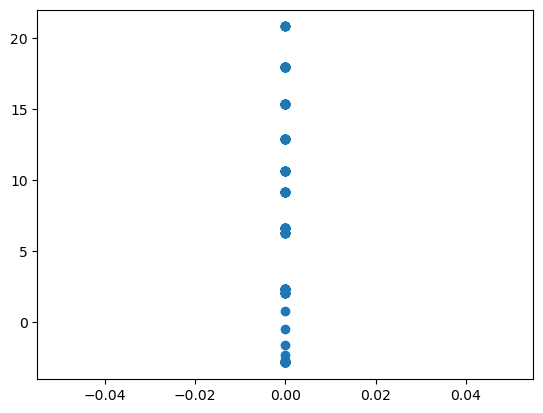

In [7]:
# Spektrum energi n = 0
energy_mm_n0 = np.linspace(-6,20,200) #emin, emax, nE

ener_new_arr_n0 = []
x_ener_n0 = []
for i in range(0,len(energy_mm_n0)):
  ener_new_arr_n0.append((eigenState(x, ngrid, vpot0, energy_mm_n0[i], dx)[0]))
  x_ener_n0.append(0)

# Plot spektrum energi
plt.scatter(x_ener_n0, ener_new_arr_n0)
#plt.title('Spektrum Energi untuk b = 22')
plt.show()

In [8]:
# Saving data to a .dat file
data_to_save0 = np.column_stack((x_ener_n0, ener_new_arr_n0))
np.savetxt('data0contoh_masalah.dat', data_to_save0, header='x_ener_n0  ener_new_arr_n0', comments='')

In [9]:
ener_new_arr_n0.sort()

In [10]:
ener_new_arr_n0

[-2.844272337680726,
 -2.844272337676537,
 -2.844272337676293,
 -2.84427233767615,
 -2.8442723376760535,
 -2.8442723376578685,
 -2.8442723376428742,
 -2.844272337433702,
 -2.844272336821903,
 -2.844272335987225,
 -2.844272329678419,
 -2.8442723262446,
 -2.844272308603094,
 -2.84427225054864,
 -2.8442722377825724,
 -2.8442721123083925,
 -2.8442718184789975,
 -2.8442716833853656,
 -2.8442712482303993,
 -2.844270220654137,
 -2.8442688508922425,
 -2.844268479546001,
 -2.8442656784071296,
 -2.8442613663984395,
 -2.844256404852593,
 -2.8442549758615283,
 -2.8442458119793272,
 -2.844233044770455,
 -2.844215703675034,
 -2.8442076338638103,
 -2.844192674766027,
 -2.8441627005761965,
 -2.844124382249065,
 -2.844076183958633,
 -2.8440327458154155,
 -2.8440164392788585,
 -2.8434478149205606,
 -2.8415965031444625,
 -2.8359903773320725,
 -2.819622711930086,
 -2.773415869629512,
 -2.648143873599332,
 -2.331291688022247,
 -1.6370851651018254,
 -0.4867457276881092,
 0.7609344872978646,
 2.0715196420552

In [11]:
nilai_energi_n0 = []
nilai_energi_n0.append(ener_new_arr_n0[0])
for j in range(1,len(ener_new_arr_n0)):
  selisih = (ener_new_arr_n0[j] - ener_new_arr_n0[j-1])
  if selisih > 0.1:
    nilai_energi_n0.append(ener_new_arr_n0[j])

In [12]:
nilai_energi_n0

[-2.844272337680726,
 -2.648143873599332,
 -2.331291688022247,
 -1.6370851651018254,
 -0.4867457276881092,
 0.7609344872978646,
 2.071519642055273,
 2.352856422777985,
 6.292199347017717,
 6.603578451785865,
 9.178984523257206,
 10.653488707392787,
 12.918372214244425,
 15.325921718606677,
 17.971748867025468,
 20.80255830145216]

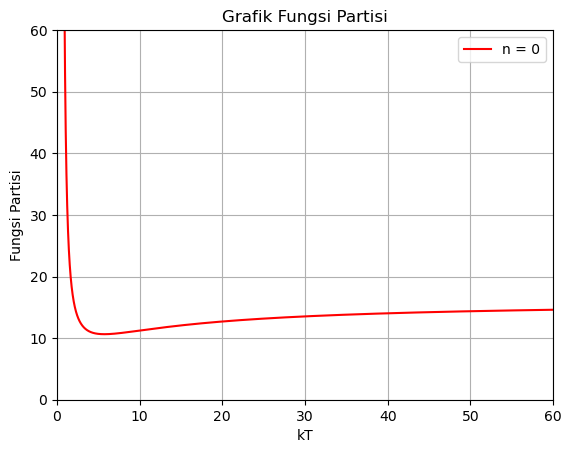

In [21]:
# Inisiasi Nilai kT
kT = np.arange(0.01,60,0.01)

# Perhitungan Fungsi Partisi n = 0
z_n0 = np.zeros(len(nilai_energi_n0))
z1_n0 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n0)):
    z_n0[i] = (np.exp(-(nilai_energi_n0[i]/kT[j])))
  z_total_n0 = np.sum(z_n0)
  z1_n0.append(z_total_n0)

# Plot Fungsi Partisi n = 1 s.d 5
plt.plot(kT,z1_n0,color='red',label='n = 0')
plt.xlabel("kT")
plt.ylabel("Fungsi Partisi")
plt.title("Grafik Fungsi Partisi")
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend()
plt.grid()
plt.show()

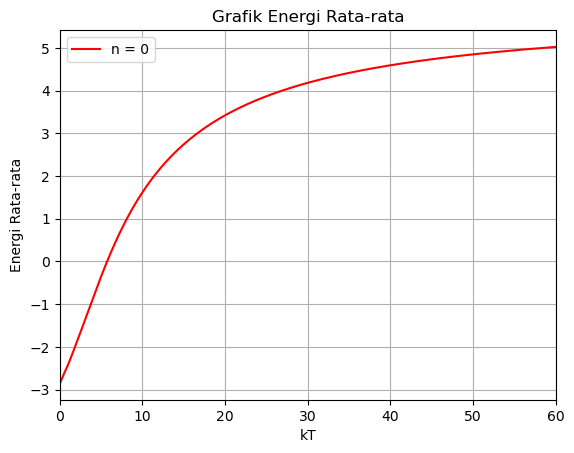

In [22]:
# Inisiasi Nilai kT
kT = np.arange(0.01,60,0.01)

# Perhitungan Energi Rata-rata n = 0
pm_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
U_n0 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n0)):
    pm_n0[i] = (nilai_energi_n0[i]*(np.exp(-(nilai_energi_n0[i]/kT[j]))))
    py_n0[i] = (np.exp(-(nilai_energi_n0[i]/kT[j])))
  Un_n0 = np.sum(pm_n0)/np.sum(py_n0)
  U_n0.append(Un_n0)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,U_n0,color='red',label='n = 0')
plt.xlabel("kT")
plt.ylabel("Energi Rata-rata")
plt.title("Grafik Energi Rata-rata")
plt.xlim(0,60)
#plt.ylim(-31,-15)
plt.legend()
plt.grid()
plt.show()

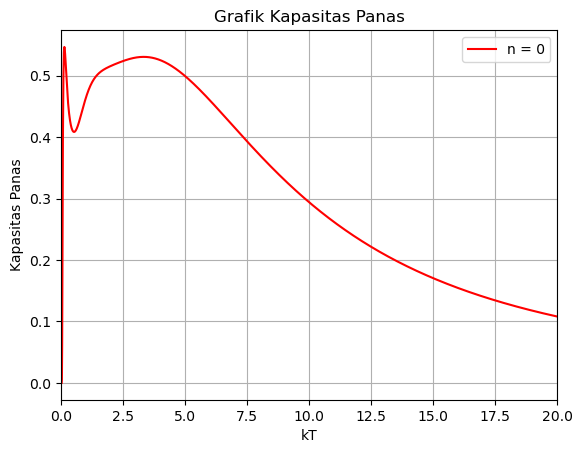

In [23]:
# Inisiasi Nilai kT
kT = np.arange(0.01,60,0.01)

# Perhitungan Kapasitas Panas n = 0
pm1_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
pm2_n0 = np.zeros(len(nilai_energi_n0))
Cv_n0 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n0)) :
    pm1_n0[i] = (nilai_energi_n0[i]**2)*(np.exp(-nilai_energi_n0[i]/kT[j]))
    py_n0[i] = np.exp(-nilai_energi_n0[i]/kT[j])
    pm2_n0[i] = nilai_energi_n0[i]*(np.exp(-nilai_energi_n0[i]/kT[j]))
  Cv_total_n0 = (1/(kT[j])**2)*((np.sum(pm1_n0)/np.sum(py_n0))-((np.sum(pm2_n0)/np.sum(py_n0))**2))
  Cv_n0.append(Cv_total_n0)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,Cv_n0,color='red',label='n = 0')
plt.xlabel("kT")
plt.ylabel("Kapasitas Panas")
plt.title("Grafik Kapasitas Panas")
plt.xlim(0,20)
plt.legend()
plt.grid()
plt.show()

In [11]:
# Saving data to a .dat file
data_to_save0 = np.column_stack((x_ener_n0, ener_new_arr_n0))
np.savetxt('data0.dat', data_to_save0, header='x_ener_n0  ener_new_arr_n0', comments='')

In [ ]:
# Spektrum energi n = 0
energy_mm_n1 = np.linspace(0,3000,30000) #emin, emax, nE

ener_new_arr_n1 = []
x_ener_n1 = []
for i in range(0,len(energy_mm_n1)):
  ener_new_arr_n1.append((eigenState(x, ngrid, vpot1, energy_mm_n1[i], dx)[0]))
  x_ener_n1.append(0)

# Plot spektrum energi
plt.scatter(x_ener_n1, ener_new_arr_n1)
plt.title('Spektrum Energi untuk b = 23')
plt.show()

In [ ]:
# Saving data to a .dat file
data_to_save1 = np.column_stack((x_ener_n1, ener_new_arr_n1))
np.savetxt('data1.dat', data_to_save1, header='x_ener_n1  ener_new_arr_n1', comments='')

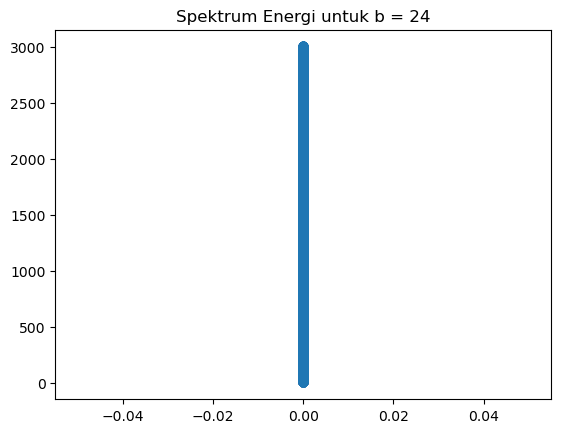

In [7]:
# Spektrum energi n = 0
energy_mm_n2 = np.linspace(0,3000,30000) #emin, emax, nE

ener_new_arr_n2 = []
x_ener_n2 = []
for i in range(0,len(energy_mm_n2)):
  ener_new_arr_n2.append((eigenState(x, ngrid, vpot2, energy_mm_n2[i], dx)[0]))
  x_ener_n2.append(0)

# Plot spektrum energi
plt.scatter(x_ener_n2, ener_new_arr_n2)
plt.title('Spektrum Energi untuk b = 24')
plt.show()

In [8]:
# Saving data to a .dat file
data_to_save2 = np.column_stack((x_ener_n2, ener_new_arr_n2))
np.savetxt('data2.dat', data_to_save2, header='x_ener_n2  ener_new_arr_n2', comments='')

In [ ]:
# Spektrum energi n = 0
energy_mm_n3 = np.linspace(-3,3000,30000) #emin, emax, nE

ener_new_arr_n3 = []
x_ener_n3 = []
for i in range(0,len(energy_mm_n3)):
  ener_new_arr_n3.append((eigenState(x, ngrid, vpot3, energy_mm_n3[i], dx)[0]))
  x_ener_n3.append(0)

# Plot spektrum energi
plt.scatter(x_ener_n3, ener_new_arr_n3)
plt.title('Spektrum Energi untuk b = 25')
plt.show()

In [ ]:
# Saving data to a .dat file
data_to_save3 = np.column_stack((x_ener_n3, ener_new_arr_n3))
np.savetxt('data3.dat', data_to_save3, header='x_ener_n3  ener_new_arr_n3', comments='')

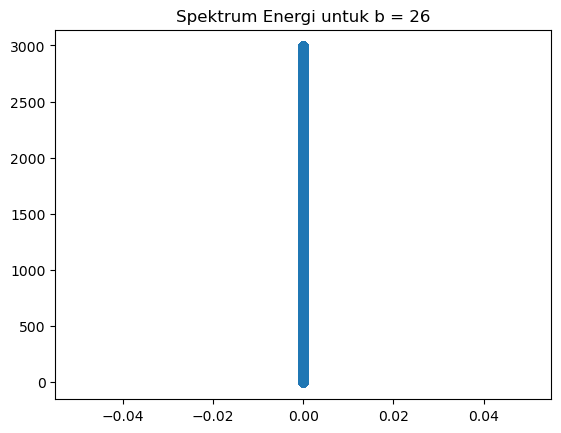

In [7]:
# Spektrum energi n = 0
energy_mm_n4 = np.linspace(-6,3000,30000) #emin, emax, nE

ener_new_arr_n4 = []
x_ener_n4 = []
for i in range(0,len(energy_mm_n4)):
  ener_new_arr_n4.append((eigenState(x, ngrid, vpot4, energy_mm_n4[i], dx)[0]))
  x_ener_n4.append(0)

# Plot spektrum energi
plt.scatter(x_ener_n4, ener_new_arr_n4)
plt.title('Spektrum Energi untuk b = 26')
plt.show()

In [8]:
# Saving data to a .dat file
data_to_save4 = np.column_stack((x_ener_n4, ener_new_arr_n4))
np.savetxt('data4.dat', data_to_save4, header='x_ener_n4  ener_new_arr_n4', comments='')

In [ ]:
# Spektrum energi n = 0
energy_mm_n5 = np.linspace(-11,3000,30000) #emin, emax, nE

ener_new_arr_n5 = []
x_ener_n5 = []
for i in range(0,len(energy_mm_n5)):
  ener_new_arr_n5.append((eigenState(x, ngrid, vpot5, energy_mm_n5[i], dx)[0]))
  x_ener_n5.append(0)

# Plot spektrum energi
plt.scatter(x_ener_n5, ener_new_arr_n5)
plt.title('Spektrum Energi untuk b = 27')
plt.show()

In [ ]:
# Saving data to a .dat file
data_to_save5 = np.column_stack((x_ener_n5, ener_new_arr_n5))
np.savetxt('data5.dat', data_to_save5, header='x_ener_n5  ener_new_arr_n5', comments='')

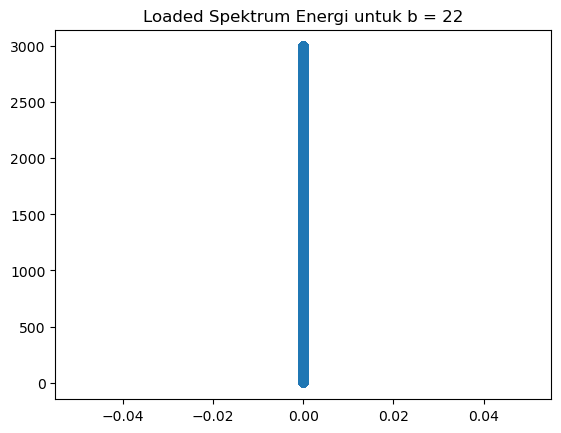

In [8]:
# Load data from the .dat file
data0 = np.loadtxt('data0.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n0_loaded = data0[:, 0]
ener_new_arr_n0_loaded = data0[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n0_loaded, ener_new_arr_n0_loaded)
plt.title('Loaded Spektrum Energi untuk b = 22')
#plt.ylim(-10, 10)
plt.show()

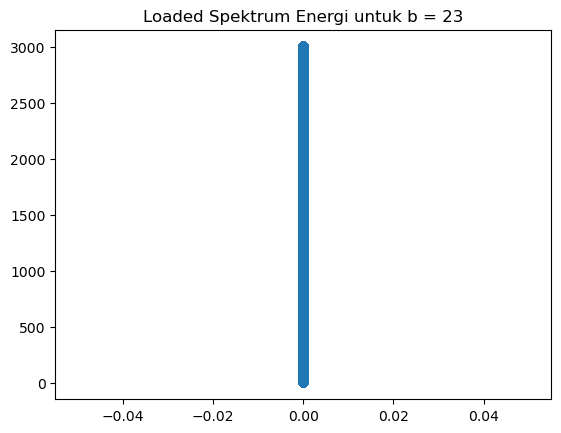

In [9]:
# Load data from the .dat file
data1 = np.loadtxt('data1.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n1_loaded = data1[:, 0]
ener_new_arr_n1_loaded = data1[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n1_loaded, ener_new_arr_n1_loaded)
plt.title('Loaded Spektrum Energi untuk b = 23')
#plt.ylim(-10, 10)
plt.show()

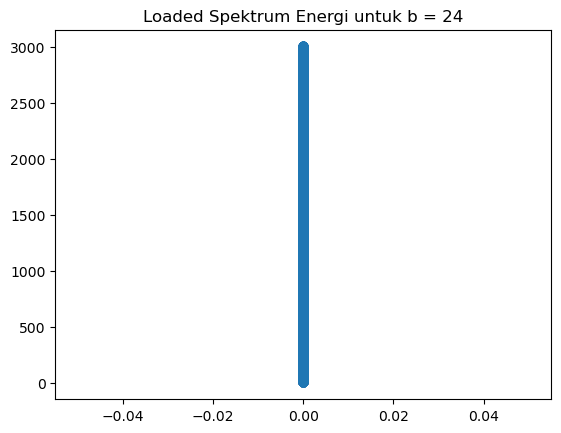

In [10]:
# Load data from the .dat file
data2 = np.loadtxt('data2.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n2_loaded = data2[:, 0]
ener_new_arr_n2_loaded = data2[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n2_loaded, ener_new_arr_n2_loaded)
plt.title('Loaded Spektrum Energi untuk b = 24')
#plt.ylim(-10, 10)
plt.show()

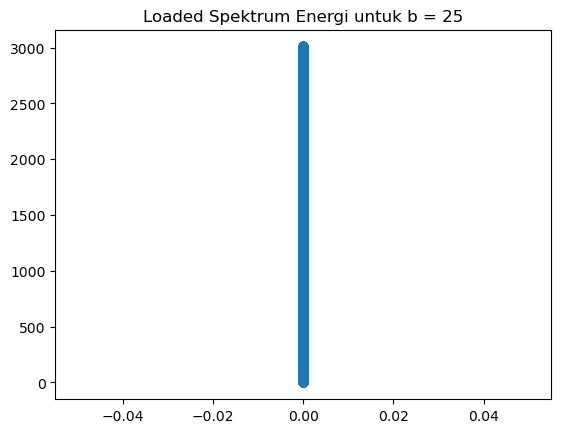

In [11]:
# Load data from the .dat file
data3 = np.loadtxt('data3.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n3_loaded = data3[:, 0]
ener_new_arr_n3_loaded = data3[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n3_loaded, ener_new_arr_n3_loaded)
plt.title('Loaded Spektrum Energi untuk b = 25')
#plt.ylim(-10, 10)
plt.show()

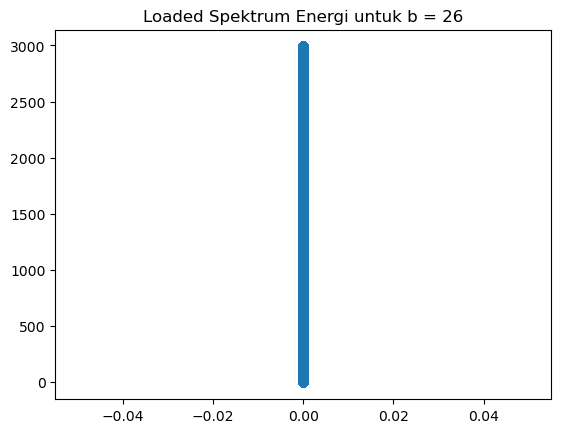

In [12]:
# Load data from the .dat file
data4 = np.loadtxt('data4.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n4_loaded = data4[:, 0]
ener_new_arr_n4_loaded = data4[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n4_loaded, ener_new_arr_n4_loaded)
plt.title('Loaded Spektrum Energi untuk b = 26')
#plt.ylim(-10, 10)
plt.show()

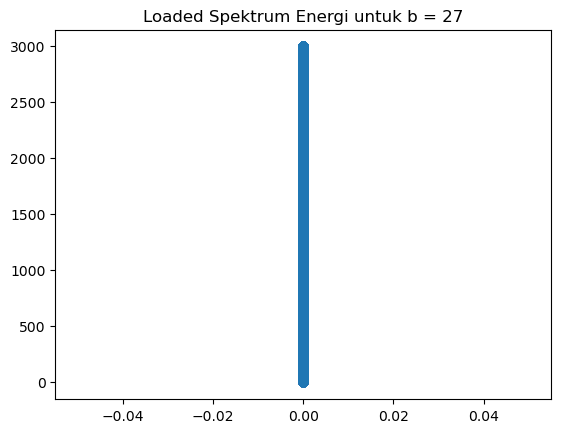

In [13]:
# Load data from the .dat file
data5 = np.loadtxt('data5.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n5_loaded = data5[:, 0]
ener_new_arr_n5_loaded = data5[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n5_loaded, ener_new_arr_n5_loaded)
plt.title('Loaded Spektrum Energi untuk b = 27')
#plt.ylim(-10, 10)
plt.show()

In [15]:
ener_new_arr_n0_loaded.sort()
ener_new_arr_n1_loaded.sort()
ener_new_arr_n2_loaded.sort()
ener_new_arr_n3_loaded.sort()
ener_new_arr_n4_loaded.sort()
ener_new_arr_n5_loaded.sort()

In [17]:
nilai_energi_n0 = []
nilai_energi_n0.append(ener_new_arr_n0_loaded[0])
for j in range(1,len(ener_new_arr_n0_loaded)):
  selisih = (ener_new_arr_n0_loaded[j] - ener_new_arr_n0_loaded[j-1])
  if selisih > 1:
    nilai_energi_n0.append(ener_new_arr_n0_loaded[j])

nilai_energi_n1 = []
nilai_energi_n1.append(ener_new_arr_n1_loaded[0])
for j in range(1,len(ener_new_arr_n1_loaded)):
  selisih = (ener_new_arr_n1_loaded[j] - ener_new_arr_n1_loaded[j-1])
  if selisih > 1:
    nilai_energi_n1.append(ener_new_arr_n1_loaded[j])

nilai_energi_n2 = []
nilai_energi_n2.append(ener_new_arr_n2_loaded[0])
for j in range(1,len(ener_new_arr_n2_loaded)):
  selisih = (ener_new_arr_n2_loaded[j] - ener_new_arr_n2_loaded[j-1])
  if selisih > 1:
    nilai_energi_n2.append(ener_new_arr_n2_loaded[j])

nilai_energi_n3 = []
nilai_energi_n3.append(ener_new_arr_n3_loaded[0])
for j in range(1,len(ener_new_arr_n3_loaded)):
  selisih = (ener_new_arr_n3_loaded[j] - ener_new_arr_n3_loaded[j-1])
  if selisih > 1:
    nilai_energi_n3.append(ener_new_arr_n3_loaded[j])

nilai_energi_n4 = []
nilai_energi_n4.append(ener_new_arr_n4_loaded[0])
for j in range(1,len(ener_new_arr_n4_loaded)):
  selisih = (ener_new_arr_n4_loaded[j] - ener_new_arr_n4_loaded[j-1])
  if selisih > 1:
    nilai_energi_n4.append(ener_new_arr_n4_loaded[j])

nilai_energi_n5 = []
nilai_energi_n5.append(ener_new_arr_n5_loaded[0])
for j in range(1,len(ener_new_arr_n5_loaded)):
  selisih = (ener_new_arr_n5_loaded[j] - ener_new_arr_n5_loaded[j-1])
  if selisih > 1:
    nilai_energi_n5.append(ener_new_arr_n5_loaded[j-1])

In [18]:
nilai_energi_n0

[2.3470643266429043,
 5.704087023898892,
 9.860638977874919,
 14.862285926727909,
 20.46510980513459,
 26.570863147725596,
 33.11150839009492,
 40.038333202474,
 47.31426876088035,
 54.90999516841038,
 62.80163599467591,
 70.96930354291409,
 79.39613049731524,
 88.06759800181872,
 96.97105346604015,
 106.09535475027724,
 115.43060137159293,
 124.96792733414186,
 134.69933866095386,
 144.61758403510575,
 154.7160504167897,
 164.98867780770308,
 175.4298889070901,
 186.03453050005498,
 196.7978241971002,
 207.71532470610964,
 218.7828842302194,
 229.996621891629,
 241.3528973123057,
 252.84828765834828,
 264.4795675903697,
 276.24369166753655,
 288.1377788356594,
 300.15909869516815,
 312.3050592970811,
 324.57319625707,
 336.9611630117127,
 349.4667220687159,
 362.0877371256573,
 374.82216595046174,
 387.66805393233676,
 400.6235282249229,
 413.68679241411166,
 426.85612165223364,
 440.12985820786,
 453.5064073871836,
 466.98423378830006,
 480.56185785465885,
 494.2378526978398,
 508.01

In [19]:
nilai_energi_n1

[2.1507273957851836,
 4.738254981091352,
 8.727797277697755,
 13.493794586403467,
 18.891565809337248,
 24.806764865623833,
 31.168451675707786,
 37.92551443475925,
 45.039254772800845,
 52.47916487785262,
 60.22047130932488,
 68.24258851032572,
 76.52809298309121,
 85.06201366080833,
 93.83132405437385,
 102.82456842634309,
 112.03158001498944,
 121.44326429103988,
 131.05142928732175,
 140.84865072623955,
 150.82816334981362,
 160.98377230451513,
 171.30978009996187,
 181.80092582020905,
 192.4523340883978,
 203.2594718783134,
 214.21811170043426,
 225.32430001244822,
 236.57432994655724,
 247.96471763046955,
 259.49218152080937,
 271.1536242779963,
 282.9461167980746,
 294.86688408537174,
 306.91329270435034,
 319.08283959283233,
 331.37314205419455,
 343.78192877494257,
 356.3070317376817,
 368.9463789190514,
 381.697987678153,
 394.55995875458854,
 407.5304708063668,
 420.6077754273933,
 433.79019259228033,
 447.0761064828949,
 460.4639616569043,
 473.9522595234384,
 487.539555095

In [20]:
nilai_energi_n2

[1.6819374562194747,
 3.4812032648966067,
 7.427859048946898,
 11.931042721783985,
 17.119420644803295,
 22.837571699421172,
 29.014051296709734,
 35.5951634654007,
 42.540612986251716,
 49.81871216681158,
 57.403793637095816,
 65.27457337718376,
 73.41306909817358,
 81.80385386721287,
 90.43352316194948,
 99.29030336183392,
 108.3637571776307,
 117.6445574383807,
 127.12431027301527,
 136.79541474859735,
 146.65094992037572,
 156.6845828338994,
 166.89049277752426,
 177.26330830488163,
 187.79805441151595,
 198.49010787257143,
 209.33515920385136,
 220.3291800464622,
 231.46839502894807,
 242.74925735393606,
 254.16842750447452,
 265.7227545805142,
 277.409259866007,
 289.2251222984919,
 301.1676655698051,
 313.234346632041,
 325.42274541985256,
 337.7305556300164,
 350.15557642378604,
 362.6957049378361,
 375.3489295061209,
 388.1133235091124,
 400.98703977835487,
 413.96830549420577,
 427.05541752272234,
 440.2467381448051,
 453.54069113655356,
 466.93575816497,
 480.43047546739876,

In [21]:
nilai_energi_n3

[0.11141416562263161,
 2.491831313321249,
 5.9082003697916186,
 10.173133379754825,
 15.136058094942179,
 20.648753786024155,
 26.63250381091939,
 33.03080015240613,
 39.80147832474556,
 46.91155330576258,
 54.33439930959974,
 62.047995435355034,
 70.03377567521258,
 78.275839870613,
 86.76039264194871,
 95.47533254617078,
 104.40994376162408,
 113.55465983072904,
 122.90087933020233,
 132.44081978054297,
 142.16740025208503,
 152.07414586821116,
 162.15510926670302,
 172.4048053694938,
 182.81815672203004,
 193.39044731826533,
 204.1172833055484,
 214.99455931786477,
 226.01842945169747,
 237.18528210054504,
 248.49171801916552,
 259.9345311086897,
 271.51069150785315,
 283.2173306497971,
 295.05172800311,
 307.01129926303275,
 319.0935857971935,
 331.2962451812592,
 343.61704268542655,
 356.05384359356975,
 368.6046062543233,
 381.2673757776264,
 394.04027830249316,
 406.9215157717927,
 419.9093611583615,
 433.00215409411055,
 446.1982968598172,
 459.4962506986283,
 472.8945324207853

In [22]:
nilai_energi_n4

[-2.9334563172107657,
 4.0739352516888925,
 8.24714896706953,
 12.935501718418903,
 18.23127300263695,
 24.011513902021687,
 30.218335468050068,
 36.80661382635836,
 43.74169769121787,
 50.99578845510123,
 58.546004394288175,
 66.37311876829253,
 74.4607078304837,
 82.79455087635242,
 91.36219409305002,
 100.15262501860752,
 109.1560241287967,
 118.36357166883873,
 127.76729497333694,
 137.3599460540145,
 147.13490221080343,
 157.08608442649364,
 167.20788968645317,
 177.49513433658728,
 187.94300628839966,
 198.54702438655409,
 209.30300362833836,
 220.20702520450644,
 231.25541054317063,
 242.44469870105573,
 253.77162657221407,
 265.23311148282653,
 276.82623581825845,
 288.5482333901475,
 300.39647730088944,
 312.36846910257606,
 324.46182907998866,
 336.67428751363957,
 349.00367680063613,
 361.44792432917524,
 374.0050460174097,
 386.67314043994963,
 399.4503834757482,
 412.33502341992664,
 425.3253765097066,
 438.4198228207667,
 451.61680249604234,
 464.91481227340915,
 478.3124

In [23]:
nilai_energi_n5

[-7.146377241450671,
 -0.20224355299398125,
 2.5606435742897506,
 6.1138521376321915,
 10.535214732004599,
 15.583817615903882,
 21.144798890563642,
 27.1479111297756,
 33.543872954569615,
 40.29543423867333,
 47.373146918693145,
 54.75298801956251,
 62.414897094461764,
 70.34181486846781,
 78.51901994214212,
 86.93365360882889,
 95.57436903914041,
 104.43106580434434,
 113.49468477519535,
 122.75704684297924,
 132.21072414957357,
 141.84893589260602,
 151.6654630165137,
 161.6545776298197,
 171.8109840545803,
 182.12976917116308,
 192.60636026920423,
 203.23648901767532,
 214.01616046687144,
 224.9416262211042,
 236.0093610937297,
 247.21604268943568,
 258.55853346248404,
 270.03386488152984,
 281.63922339638464,
 293.37193795396007,
 305.22946885239793,
 317.20939775633417,
 329.30941872378025,
 341.52733011795357,
 353.861027296036,
 366.3084959824926,
 378.8678062475093,
 391.53710702210986,
 404.3146210905616,
 417.19864050859775,
 430.1875224024301,
 443.2796851093171,
 456.47360

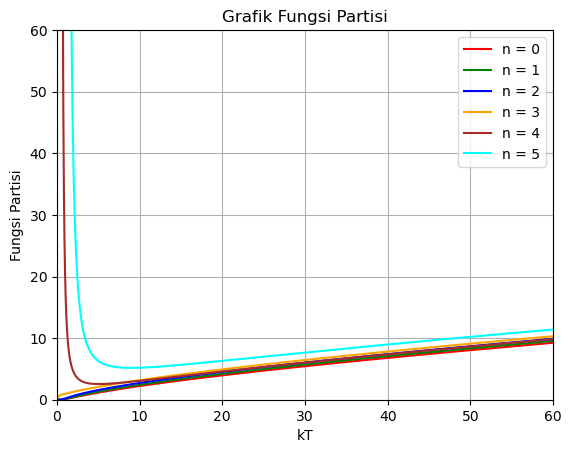

In [24]:
# Inisiasi Nilai kT
kT = np.arange(0.1,60,0.01)

# Perhitungan Fungsi Partisi n = 0
z_n0 = np.zeros(len(nilai_energi_n0))
z1_n0 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n0)):
    z_n0[i] = (np.exp(-(nilai_energi_n0[i]/kT[j])))
  z_total_n0 = np.sum(z_n0)
  z1_n0.append(z_total_n0)

# Perhitungan Fungsi Partisi n = 1
z_n1 = np.zeros(len(nilai_energi_n1))
z1_n1 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n1)):
    z_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
  z_total_n1 = np.sum(z_n1)
  z1_n1.append(z_total_n1)

# Perhitungan Fungsi Partisi n = 2
z_n2 = np.zeros(len(nilai_energi_n2))
z1_n2 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n2)):
    z_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
  z_total_n2 = np.sum(z_n2)
  z1_n2.append(z_total_n2)

# Perhitungan Fungsi Partisi n = 3
z_n3 = np.zeros(len(nilai_energi_n3))
z1_n3 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n3)):
    z_n3[i] = np.exp(-nilai_energi_n3[i]/kT[j])
  z_total_n3 = np.sum(z_n3)
  z1_n3.append(z_total_n3)

# Perhitungan Fungsi Partisi n = 4
z_n4 = np.zeros(len(nilai_energi_n4))
z1_n4 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n4)):
    z_n4[i] = np.exp(-nilai_energi_n4[i]/kT[j])
  z_total_n4 = np.sum(z_n4)
  z1_n4.append(z_total_n4)

# Perhitungan Fungsi Partisi n = 5
z_n5 = np.zeros(len(nilai_energi_n5))
z1_n5 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n5)):
    z_n5[i] = np.exp(-nilai_energi_n5[i]/kT[j])
  z_total_n5 = np.sum(z_n5)
  z1_n5.append(z_total_n5)

# Plot Fungsi Partisi n = 1 s.d 5
plt.plot(kT,z1_n0,color='red',label='n = 0')
plt.plot(kT,z1_n1,color='green',label='n = 1')
plt.plot(kT,z1_n2,color='blue',label='n = 2')
plt.plot(kT,z1_n3,color='orange',label='n = 3')
plt.plot(kT,z1_n4,color='brown',label='n = 4')
plt.plot(kT,z1_n5,color='cyan',label='n = 5')
plt.xlabel("kT")
plt.ylabel("Fungsi Partisi")
plt.title("Grafik Fungsi Partisi")
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend()
plt.grid()
plt.show()

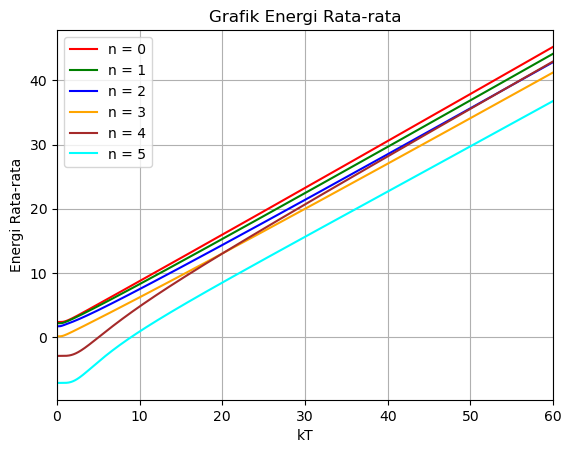

In [25]:
# Inisiasi Nilai kT
kT = np.arange(0.1,60,0.01)

# Perhitungan Energi Rata-rata n = 0
pm_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
U_n0 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n0)):
    pm_n0[i] = (nilai_energi_n0[i]*(np.exp(-(nilai_energi_n0[i]/kT[j]))))
    py_n0[i] = (np.exp(-(nilai_energi_n0[i]/kT[j])))
  Un_n0 = np.sum(pm_n0)/np.sum(py_n0)
  U_n0.append(Un_n0)

# Perhitungan Energi Rata-rata n = 1
pm_n1 = np.zeros(len(nilai_energi_n1))
py_n1 = np.zeros(len(nilai_energi_n1))
U_n1 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n1)):
    pm_n1[i] = (nilai_energi_n1[i]*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
    py_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
  Un_n1 = np.sum(pm_n1)/np.sum(py_n1)
  U_n1.append(Un_n1)

# Perhitungan Energi Rata-rata n = 2
pm_n2 = np.zeros(len(nilai_energi_n2))
py_n2 = np.zeros(len(nilai_energi_n2))
U_n2 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n2)):
    pm_n2[i] = (nilai_energi_n2[i]*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
    py_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
  Un_n2 = np.sum(pm_n2)/np.sum(py_n2)
  U_n2.append(Un_n2)

# Perhitungan Energi Rata-rata n = 3
pm_n3 = np.zeros(len(nilai_energi_n3))
py_n3 = np.zeros(len(nilai_energi_n3))
U_n3 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n3)):
    pm_n3[i] = (nilai_energi_n3[i]*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
    py_n3[i] = (np.exp(-(nilai_energi_n3[i]/kT[j])))
  Un_n3 = np.sum(pm_n3)/np.sum(py_n3)
  U_n3.append(Un_n3)

# Perhitungan Energi Rata-rata n = 4
pm_n4 = np.zeros(len(nilai_energi_n4))
py_n4 = np.zeros(len(nilai_energi_n4))
U_n4 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n4)):
    pm_n4[i] = (nilai_energi_n4[i]*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
    py_n4[i] = (np.exp(-(nilai_energi_n4[i]/kT[j])))
  Un_n4 = np.sum(pm_n4)/np.sum(py_n4)
  U_n4.append(Un_n4)

# Perhitungan Energi Rata-rata n = 5
pm_n5 = np.zeros(len(nilai_energi_n5))
py_n5 = np.zeros(len(nilai_energi_n5))
U_n5 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n5)):
    pm_n5[i] = (nilai_energi_n5[i]*(np.exp(-(nilai_energi_n5[i]/kT[j]))))
    py_n5[i] = (np.exp(-(nilai_energi_n5[i]/kT[j])))
  Un_n5 = np.sum(pm_n5)/np.sum(py_n5)
  U_n5.append(Un_n5)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,U_n0,color='red',label='n = 0')
plt.plot(kT,U_n1,color='green',label='n = 1')
plt.plot(kT,U_n2,color='blue',label='n = 2')
plt.plot(kT,U_n3,color='orange',label='n = 3')
plt.plot(kT,U_n4,color='brown',label='n = 4')
plt.plot(kT,U_n5,color='cyan',label='n = 5')
plt.xlabel("kT")
plt.ylabel("Energi Rata-rata")
plt.title("Grafik Energi Rata-rata")
plt.xlim(0,60)
#plt.ylim(-31,-15)
plt.legend()
plt.grid()
plt.show()

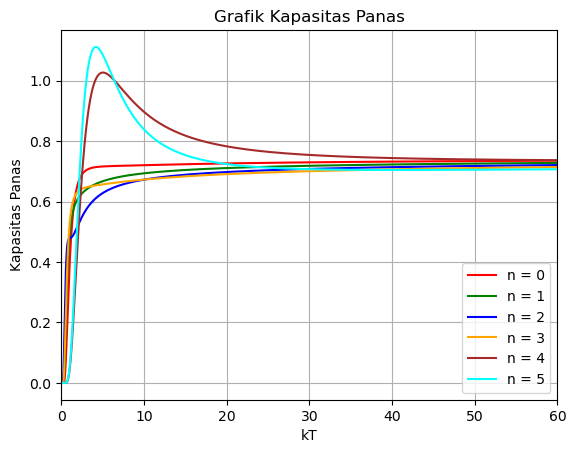

In [26]:
# Inisiasi Nilai kT
kT = np.arange(0.1,60,0.01)

# Perhitungan Kapasitas Panas n = 0
pm1_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
pm2_n0 = np.zeros(len(nilai_energi_n0))
Cv_n0 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n0)) :
    pm1_n0[i] = (nilai_energi_n0[i]**2)*(np.exp(-nilai_energi_n0[i]/kT[j]))
    py_n0[i] = np.exp(-nilai_energi_n0[i]/kT[j])
    pm2_n0[i] = nilai_energi_n0[i]*(np.exp(-nilai_energi_n0[i]/kT[j]))
  Cv_total_n0 = (1/(kT[j])**2)*((np.sum(pm1_n0)/np.sum(py_n0))-((np.sum(pm2_n0)/np.sum(py_n0))**2))
  Cv_n0.append(Cv_total_n0)

# Perhitungan Kapasitas Panas n = 1
pm1_n1 = np.zeros(len(nilai_energi_n1))
py_n1 = np.zeros(len(nilai_energi_n1))
pm2_n1 = np.zeros(len(nilai_energi_n1))
Cv_n1 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n1)) :
    pm1_n1[i] = (((nilai_energi_n1[i])**2)*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
    py_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
    pm2_n1[i] = (nilai_energi_n1[i]*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
  Cv_total_n1 = ((1/kT[j])**2)*((np.sum(pm1_n1)/np.sum(py_n1))-((np.sum(pm2_n1)/np.sum(py_n1))**2))
  Cv_n1.append(Cv_total_n1)

# Perhitungan Kapasitas Panas n = 2
pm1_n2 = np.zeros(len(nilai_energi_n2))
py_n2 = np.zeros(len(nilai_energi_n2))
pm2_n2 = np.zeros(len(nilai_energi_n2))
Cv_n2 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n2)) :
    pm1_n2[i] = (((nilai_energi_n2[i])**2)*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
    py_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
    pm2_n2[i] = (nilai_energi_n2[i]*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
  Cv_total_n2 = ((1/kT[j])**2)*((np.sum(pm1_n2)/np.sum(py_n2))-((np.sum(pm2_n2)/np.sum(py_n2))**2))
  Cv_n2.append(Cv_total_n2)

# Perhitungan Kapasitas Panas n = 3
pm1_n3 = np.zeros(len(nilai_energi_n3))
py_n3 = np.zeros(len(nilai_energi_n3))
pm2_n3 = np.zeros(len(nilai_energi_n3))
Cv_n3 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n3)) :
    pm1_n3[i] = (((nilai_energi_n3[i])**2)*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
    py_n3[i] = (np.exp(-(nilai_energi_n3[i]/kT[j])))
    pm2_n3[i] = (nilai_energi_n3[i]*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
  Cv_total_n3 = ((1/kT[j])**2)*((np.sum(pm1_n3)/np.sum(py_n3))-((np.sum(pm2_n3)/np.sum(py_n3))**2))
  Cv_n3.append(Cv_total_n3)

# Perhitungan Kapasitas Panas n = 4
pm1_n4 = np.zeros(len(nilai_energi_n4))
py_n4 = np.zeros(len(nilai_energi_n4))
pm2_n4 = np.zeros(len(nilai_energi_n4))
Cv_n4 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n4)) :
    pm1_n4[i] = (((nilai_energi_n4[i])**2)*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
    py_n4[i] = (np.exp(-(nilai_energi_n4[i]/kT[j])))
    pm2_n4[i] = (nilai_energi_n4[i]*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
  Cv_total_n4 = ((1/kT[j])**2)*((np.sum(pm1_n4)/np.sum(py_n4))-((np.sum(pm2_n4)/np.sum(py_n4))**2))
  Cv_n4.append(Cv_total_n4)

# Perhitungan Kapasitas Panas n = 5
pm1_n5 = np.zeros(len(nilai_energi_n5))
py_n5 = np.zeros(len(nilai_energi_n5))
pm2_n5 = np.zeros(len(nilai_energi_n5))
Cv_n5 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n5)) :
    pm1_n5[i] = (nilai_energi_n5[i]**2)*(np.exp(-nilai_energi_n5[i]/kT[j]))
    py_n5[i] = np.exp(-nilai_energi_n5[i]/kT[j])
    pm2_n5[i] = nilai_energi_n5[i]*(np.exp(-nilai_energi_n5[i]/kT[j]))
  Cv_total_n5 = (1/(kT[j]**2))*((np.sum(pm1_n5)/np.sum(py_n5))-((np.sum(pm2_n5)/np.sum(py_n5))**2))
  Cv_n5.append(Cv_total_n5)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,Cv_n0,color='red',label='n = 0')
plt.plot(kT,Cv_n1,color='green',label='n = 1')
plt.plot(kT,Cv_n2,color='blue',label='n = 2')
plt.plot(kT,Cv_n3,color='orange',label='n = 3')
plt.plot(kT,Cv_n4,color='brown',label='n = 4')
plt.plot(kT,Cv_n5,color='cyan',label='n = 5')
plt.xlabel("kT")
plt.ylabel("Kapasitas Panas")
plt.title("Grafik Kapasitas Panas")
plt.xlim(0,60)
plt.legend()
plt.grid()
plt.show()

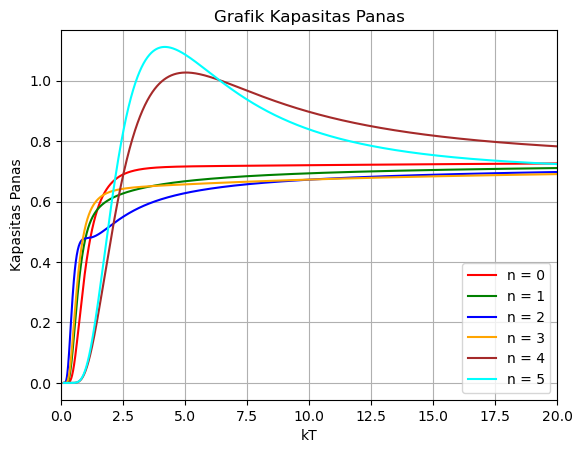

In [27]:
# Inisiasi Nilai kT
kT = np.arange(0.1,60,0.01)

# Perhitungan Kapasitas Panas n = 0
pm1_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
pm2_n0 = np.zeros(len(nilai_energi_n0))
Cv_n0 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n0)) :
    pm1_n0[i] = (nilai_energi_n0[i]**2)*(np.exp(-nilai_energi_n0[i]/kT[j]))
    py_n0[i] = np.exp(-nilai_energi_n0[i]/kT[j])
    pm2_n0[i] = nilai_energi_n0[i]*(np.exp(-nilai_energi_n0[i]/kT[j]))
  Cv_total_n0 = (1/(kT[j])**2)*((np.sum(pm1_n0)/np.sum(py_n0))-((np.sum(pm2_n0)/np.sum(py_n0))**2))
  Cv_n0.append(Cv_total_n0)

# Perhitungan Kapasitas Panas n = 1
pm1_n1 = np.zeros(len(nilai_energi_n1))
py_n1 = np.zeros(len(nilai_energi_n1))
pm2_n1 = np.zeros(len(nilai_energi_n1))
Cv_n1 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n1)) :
    pm1_n1[i] = (((nilai_energi_n1[i])**2)*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
    py_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
    pm2_n1[i] = (nilai_energi_n1[i]*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
  Cv_total_n1 = ((1/kT[j])**2)*((np.sum(pm1_n1)/np.sum(py_n1))-((np.sum(pm2_n1)/np.sum(py_n1))**2))
  Cv_n1.append(Cv_total_n1)

# Perhitungan Kapasitas Panas n = 2
pm1_n2 = np.zeros(len(nilai_energi_n2))
py_n2 = np.zeros(len(nilai_energi_n2))
pm2_n2 = np.zeros(len(nilai_energi_n2))
Cv_n2 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n2)) :
    pm1_n2[i] = (((nilai_energi_n2[i])**2)*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
    py_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
    pm2_n2[i] = (nilai_energi_n2[i]*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
  Cv_total_n2 = ((1/kT[j])**2)*((np.sum(pm1_n2)/np.sum(py_n2))-((np.sum(pm2_n2)/np.sum(py_n2))**2))
  Cv_n2.append(Cv_total_n2)

# Perhitungan Kapasitas Panas n = 3
pm1_n3 = np.zeros(len(nilai_energi_n3))
py_n3 = np.zeros(len(nilai_energi_n3))
pm2_n3 = np.zeros(len(nilai_energi_n3))
Cv_n3 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n3)) :
    pm1_n3[i] = (((nilai_energi_n3[i])**2)*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
    py_n3[i] = (np.exp(-(nilai_energi_n3[i]/kT[j])))
    pm2_n3[i] = (nilai_energi_n3[i]*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
  Cv_total_n3 = ((1/kT[j])**2)*((np.sum(pm1_n3)/np.sum(py_n3))-((np.sum(pm2_n3)/np.sum(py_n3))**2))
  Cv_n3.append(Cv_total_n3)

# Perhitungan Kapasitas Panas n = 4
pm1_n4 = np.zeros(len(nilai_energi_n4))
py_n4 = np.zeros(len(nilai_energi_n4))
pm2_n4 = np.zeros(len(nilai_energi_n4))
Cv_n4 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n4)) :
    pm1_n4[i] = (((nilai_energi_n4[i])**2)*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
    py_n4[i] = (np.exp(-(nilai_energi_n4[i]/kT[j])))
    pm2_n4[i] = (nilai_energi_n4[i]*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
  Cv_total_n4 = ((1/kT[j])**2)*((np.sum(pm1_n4)/np.sum(py_n4))-((np.sum(pm2_n4)/np.sum(py_n4))**2))
  Cv_n4.append(Cv_total_n4)

# Perhitungan Kapasitas Panas n = 5
pm1_n5 = np.zeros(len(nilai_energi_n5))
py_n5 = np.zeros(len(nilai_energi_n5))
pm2_n5 = np.zeros(len(nilai_energi_n5))
Cv_n5 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n5)) :
    pm1_n5[i] = (nilai_energi_n5[i]**2)*(np.exp(-nilai_energi_n5[i]/kT[j]))
    py_n5[i] = np.exp(-nilai_energi_n5[i]/kT[j])
    pm2_n5[i] = nilai_energi_n5[i]*(np.exp(-nilai_energi_n5[i]/kT[j]))
  Cv_total_n5 = (1/(kT[j]**2))*((np.sum(pm1_n5)/np.sum(py_n5))-((np.sum(pm2_n5)/np.sum(py_n5))**2))
  Cv_n5.append(Cv_total_n5)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,Cv_n0,color='red',label='n = 0')
plt.plot(kT,Cv_n1,color='green',label='n = 1')
plt.plot(kT,Cv_n2,color='blue',label='n = 2')
plt.plot(kT,Cv_n3,color='orange',label='n = 3')
plt.plot(kT,Cv_n4,color='brown',label='n = 4')
plt.plot(kT,Cv_n5,color='cyan',label='n = 5')
plt.xlabel("kT")
plt.ylabel("Kapasitas Panas")
plt.title("Grafik Kapasitas Panas")
plt.xlim(0,20)
plt.legend()
plt.grid()
plt.show()